In [2]:
import numpy as np
import skimage.io as io
import skimage
from skimage import io, color, img_as_float

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2






In [18]:
import numpy as np

def color_stat(img):
    
    counter = dict()

    
    rows , columns, channels= img.shape
    pixels = rows * columns
    
    print(rows , columns, channels,pixels)
    for r in range(rows):   #for each column
        for c in range(columns):   
            red , green , blue , a = img[r,c]
            L , a , b = skimage.color.rgb2lab((red,green,blue))
            
            key = "{}/{}/{}".format(round(L),round(a),round(b))
            if not key in counter:
                counter[key] = 0
            counter[key] += 1
            
    #sort
    keys = set()
    cnt = 0
    counter = {k: v for k, v in sorted(counter.items(), key=lambda item: item[1], reverse=True)}
    for k , v in counter.items():
        if cnt / pixels > 0.5: break
        cnt += v
        keys.add(k)
        print(k,v)
    
    
    nimg = np.copy(img)

    
    for r in range(rows):   #for each column
        for c in range(columns):   
            red , green , blue , a = img[r,c]
            L , a , b = skimage.color.rgb2lab((red,green,blue))
            
            key = "{}/{}/{}".format(round(L),round(a),round(b))
            if key in keys:
                nimg[r,c] = [ 0, 0, 0 , 255] #black
            else:
                nimg[r,c] = [ 255, 255, 255 , 255] #white

    
    return nimg
    

        
    
def split_img(image_path):
    I = io.imread(image_path)
    if I.shape[2] == 3:
        I =  cv2.cvtColor(I, cv2.COLOR_RGB2RGBA);

    plt.rcParams['figure.dpi'] = 100
    plt.axis('off')
    plt.imshow(I)
    plt.show()


    filtered = color_stat(I)
   
    plt.imshow(filtered)
    plt.show()

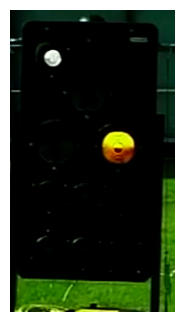

370 201 4 74370
0/0/0 49975


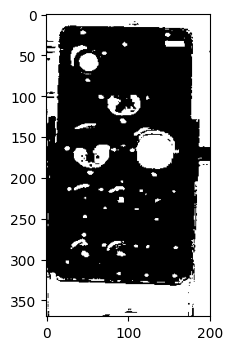

In [19]:
split_img('data/drohne-signals/traffic_light0032.png')

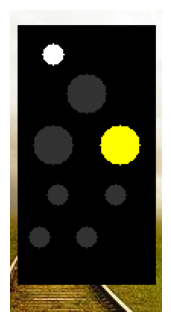

200 100 4 20000
0/0/0 13320


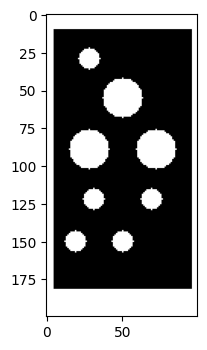

In [20]:
split_img("data/gen-signals/kshauptsignal2_Ks2_vBw.png")

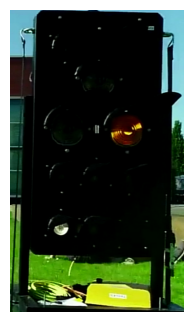

774 444 4 343656
0/0/0 170669
1/-2/1 11854


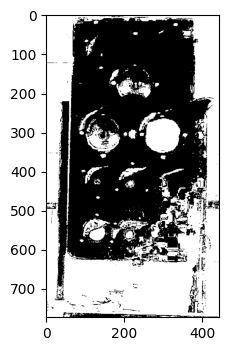

In [22]:
split_img("data/drohne-signals/traffic_light0011.png")

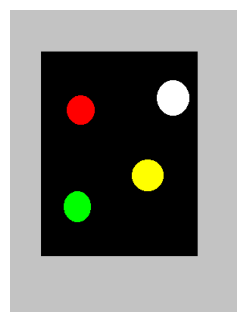

400 300 4 120000
79/0/0 63903


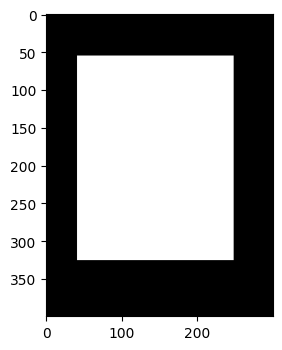

In [23]:
split_img("data/color_bubbles.png")